Cybersecurity Threat Classification

Import Libraries

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,)
import seaborn as sns
import matplotlib.pyplot as plt


In [97]:
# Load dataset
df = pd.read_csv('dataset.csv')
df.columns = df.columns.str.strip()  # Clean column names

Data Preprocessing

In [98]:
# Normalize features
def normalize_features(X):
    """Scales features using StandardScaler."""
    scaler = StandardScaler()
    return scaler.fit_transform(X)

In [99]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [100]:
# Handle feature selection
def select_features(df):
    """Removes highly correlated and low-variance features while handling invalid values."""
    df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
    df.dropna(inplace=True)  # Drop rows with NaN values

    corr_matrix = df.drop(columns=["Label"]).corr()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    high_corr_features = [
        column for column in upper.columns if any(upper[column] > 0.9)
    ]
    df_reduced = df.drop(columns=high_corr_features)

    X = df_reduced.drop(columns=["Label"])
    y = df_reduced["Label"].map({"BENIGN": 0, "DDoS": 1})

    selector = VarianceThreshold(threshold=0.01)
    X_selected = selector.fit_transform(X)
    selected_features = X.columns[selector.get_support()]
    return pd.DataFrame(X_selected, columns=selected_features), y

In [101]:
# Normalize features
def normalize_features(X):
    """Scales features using StandardScaler."""
    scaler = StandardScaler()
    return scaler.fit_transform(X)

Training Models

In [102]:
# Train models
def train_models(X_train, y_train):
    """Trains Random Forest and SVM classifiers."""
    rf = RandomForestClassifier(class_weight="balanced", random_state=42)
    svm = SVC(class_weight="balanced", random_state=42)
    rf.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    return rf, svm

In [103]:
# Evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    """Evaluates the model and prints performance metrics."""
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["BENIGN", "DDoS"],
        yticklabels=["BENIGN", "DDoS"],
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    
    #Precision Recall 
    from sklearn.metrics import precision_recall_curve
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred)
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, marker='.', label=f"{model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.show()

In [104]:
# Main execution
X, y = select_features(df)
X = normalize_features(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
rf_model, svm_model = train_models(X_train, y_train)


Random Forest Model


Random Forest Performance:
Accuracy: 0.9996
Precision: 1.0000
Recall: 0.9991
F1-Score: 0.9996


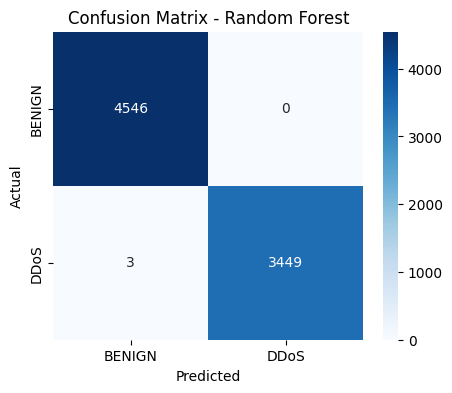

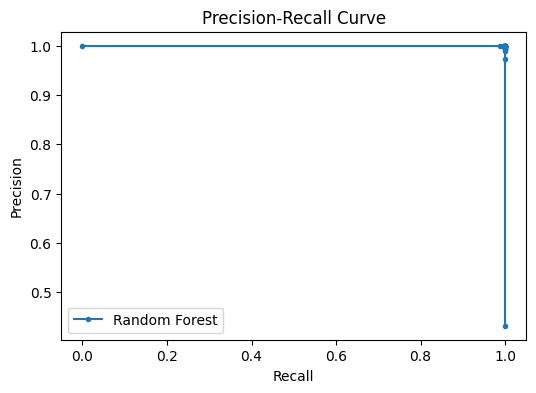

In [105]:
evaluate_model(rf_model, X_test, y_test, "Random Forest")
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

Support Vector Machine


SVM Performance:
Accuracy: 0.9814
Precision: 0.9596
Recall: 0.9988
F1-Score: 0.9789


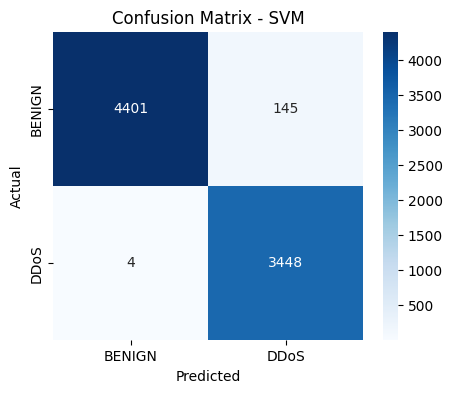

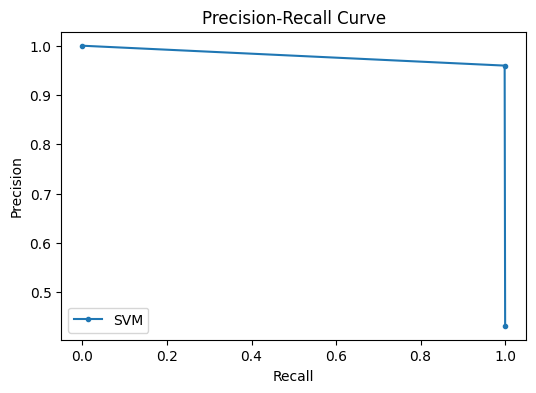

In [106]:
evaluate_model(svm_model, X_test, y_test, "SVM")
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test))

Neural Networks - MLP Classifier

In [107]:
import tensorflow as tf
from tensorflow import keras

In [108]:
# Build MLP Classifier
def build_mlp_model(input_shape):
    """Creates and compiles a Multi-Layer Perceptron (MLP) classifier."""
    model = keras.Sequential(
        [
            keras.layers.Dense(128, activation="relu", input_shape=(input_shape,)),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(64, activation="relu"),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(32, activation="relu"),
            keras.layers.Dense(1, activation="sigmoid"),
        ]
    )
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model


mlp_model = build_mlp_model(X_train.shape[1])

# Train the model
history = mlp_model.fit(
    X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test)
)

# Evaluate the model
y_pred = (mlp_model.predict(X_test) > 0.5).astype(int)

Epoch 1/25


c:\Users\srishti\anaconda3\envs\MachineLearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9594 - loss: 0.1081 - val_accuracy: 0.9981 - val_loss: 0.0150
Epoch 2/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9979 - loss: 0.0101 - val_accuracy: 0.9964 - val_loss: 0.0112
Epoch 3/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9977 - loss: 0.0100 - val_accuracy: 0.9987 - val_loss: 0.0072
Epoch 4/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9987 - loss: 0.0054 - val_accuracy: 0.9990 - val_loss: 0.0041
Epoch 5/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9990 - loss: 0.0044 - val_accuracy: 0.9986 - val_loss: 0.0052
Epoch 6/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9982 - loss: 0.0039 - val_accuracy: 0.9989 - val_loss: 0.0042
Epoch 7/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9991 - loss: 0.0035 - val_accuracy: 0.9989 - val_loss: 0.0046
Epoch 8/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9988 - loss: 0.0042 - val_accurac

In [109]:
print("\nMLP Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
mlp_accuracy = accuracy_score(y_test, y_pred)
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")


MLP Classifier Performance:
Accuracy: 0.9992
Precision: 0.9986
Recall: 0.9997
F1-Score: 0.9991


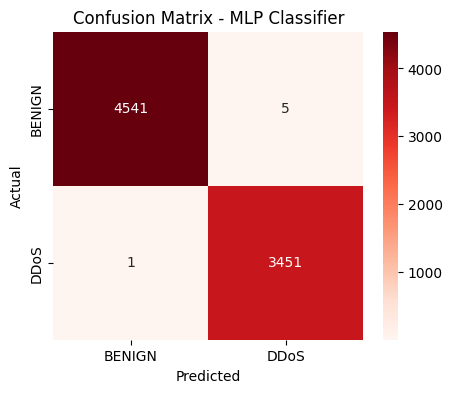

In [110]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Reds",
    xticklabels=["BENIGN", "DDoS"],
    yticklabels=["BENIGN", "DDoS"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MLP Classifier")
plt.show()

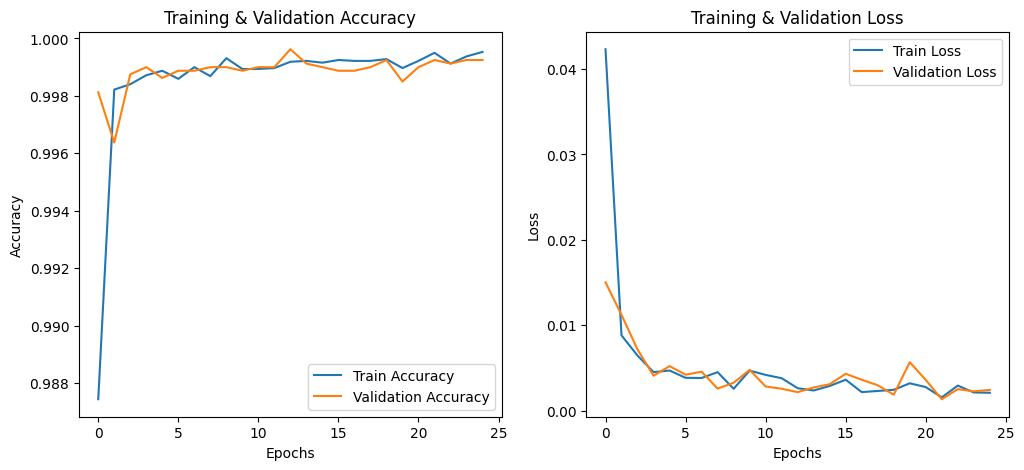

In [111]:
# Accuracy & Loss Plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.show()

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


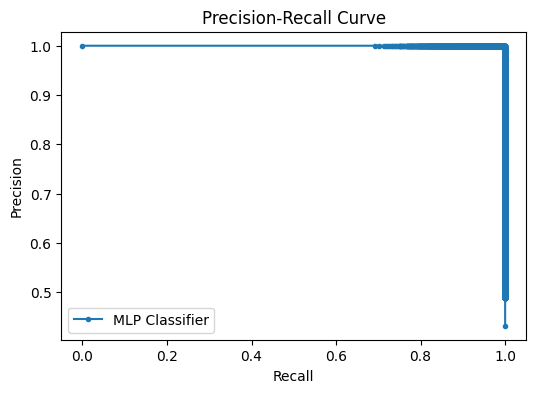

In [112]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, mlp_model.predict(X_test))
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker=".", label="MLP Classifier")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

Compare the three models

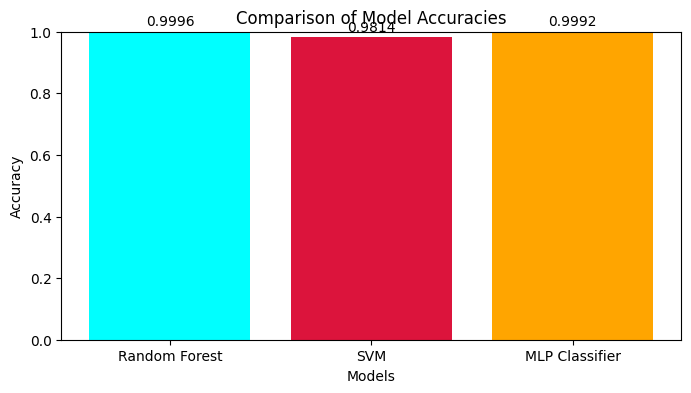

In [118]:
# Compare Accuracies
models = ["Random Forest", "SVM", "MLP Classifier"]
accuracies = [rf_accuracy, svm_accuracy, mlp_accuracy]

plt.figure(figsize=(8, 4))
plt.bar(models, accuracies, color=["cyan", "crimson", "orange"])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.4f}", ha="center", fontsize=10)
plt.show()